<a href="https://colab.research.google.com/github/mcalmeida13/math-machine-learning/blob/main/logistic-regression/e_commerce_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from sklearn.utils import shuffle
import matplotlib.pyplot as plt

In [2]:
path ='https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/ann_logistic_extra/ecommerce_data.csv'
df = pd.read_csv(path)
df.head()

,is_mobile,n_products_viewed,visit_duration,is_returning_visitor,time_of_day,user_action
0,1,0,0.657510,0,3,0
1,1,1,0.568571,0,2,1
2,1,0,0.042246,1,1,0
3,1,1,1.659793,1,1,2
4,0,1,2.014745,1,1,2


In [3]:
df = df.sample(frac=1).reset_index(drop=True)

In [4]:
df.head()

,is_mobile,n_products_viewed,visit_duration,is_returning_visitor,time_of_day,user_action
0,0,2,1.458406,0,0,1
1,1,1,1.071975,1,1,2
2,1,3,2.081424,1,2,3
3,0,2,0.119630,0,3,0
4,0,0,0.791035,0,2,0


In [5]:
# Columns by its type
categorial = ['is_mobile','is_returning_visitor','time_of_day']
numerical = ['n_products_viewed', 'visit_duration']

In [7]:
time_of_day = df['time_of_day'].unique()

In [8]:
# One-hot enconding the time_of_day
for day in time_of_day:
  df['day_'+str(day)] = df['time_of_day'].apply( lambda x: 1 if x == day else 0)

In [9]:
df.head()

,is_mobile,n_products_viewed,visit_duration,is_returning_visitor,time_of_day,user_action,day_0,day_1,day_2,day_3
0,0,2,1.458406,0,0,1,1,0,0,0
1,1,1,1.071975,1,1,2,0,1,0,0
2,1,3,2.081424,1,2,3,0,0,1,0
3,0,2,0.119630,0,3,0,0,0,0,1
4,0,0,0.791035,0,2,0,0,0,1,0


In [10]:
X = df.drop(['time_of_day','user_action'], axis =1)
y = df['user_action'].astype(np.int32)

In [11]:
X.columns

Index(['is_mobile', 'n_products_viewed', 'visit_duration',
       'is_returning_visitor', 'day_0', 'day_1', 'day_2', 'day_3'],
      dtype='object')

In [41]:
Xtrain = X[:-100]
Ytrain = y[:-100]
Xtest = X[-100:]
Ytest = y[-100:]

In [30]:
for col in numerical:
  m = Xtrain[col].mean()
  s = Xtrain[col].std()
  Xtrain.loc[col] = (Xtrain[col] - m)/s
  Xtest.loc[col] = (Xtest[col] - m)/s

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [52]:
  X2train = Xtrain[Ytrain <= 1]
  Y2train = Ytrain[Ytrain <= 1]
  X2test = Xtest[Ytest <= 1]
  Y2test = Ytest[Ytest <= 1]

In [53]:
# randomly initialize weights
D = X2train.shape[1]
W = np.random.randn(D)
b = 0 # bias term

In [54]:
def sigmoid(z):
  return 1/(1+np.exp(-z))

In [55]:
def output(X,W,b):
    return sigmoid(X.dot(W)+ b)

In [56]:
# accuracy
def classification_rate(Y,P):
  return np.mean(Y==P)

In [57]:
# cross entropy
def cross_entropy(T, pY):
    return -np.mean(T*np.log(pY) + (1 - T)*np.log(1 - pY))

In [63]:
train_costs = []
test_costs = []
learning_rate = 0.001
for i in range(10000):
  pYtrain = output(X2train,W,b)
  pYtest = output(X2test,W,b)

  ctrain = cross_entropy(Y2train, pYtrain)
  ctest = cross_entropy(Y2test, pYtest)
  train_costs.append(ctrain)
  test_costs.append(ctest)

  # gradient descent
  W -= learning_rate*X2train.T.dot(pYtrain - Y2train)
  b -= learning_rate*(pYtrain - Y2train).sum()
  if i % 1000 == 0:
      print(i, ctrain, ctest)

0 0.1710672052238707 0.25508060236941305
1000 0.16779152129874472 0.2537041521497866
2000 0.1672966436085092 0.254335964812791
3000 0.1671989908889377 0.2547998574930329
4000 0.16717775474835975 0.2550526747563615
5000 0.16717293910210956 0.2551810208070834
6000 0.16717182584856655 0.2552445348114074
7000 0.1671715661392476 0.2552756291224582
8000 0.16717150528712343 0.2552907777338137
9000 0.1671714909989182 0.2552981409905236


In [64]:
print("Final train classification_rate:", classification_rate(Y2train, np.round(pYtrain)))
print("Final test classification_rate:", classification_rate(Y2test, np.round(pYtest)))

Final train classification_rate: 0.978125
Final test classification_rate: 0.9487179487179487


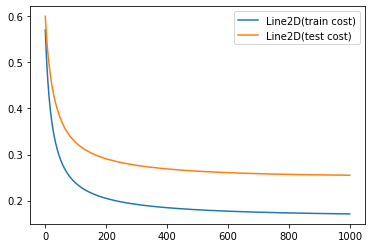

In [62]:
legend1, = plt.plot(train_costs, label='train cost')
legend2, = plt.plot(test_costs, label='test cost')
plt.legend([legend1, legend2])
plt.show()